<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Standardize-dataset" data-toc-modified-id="Standardize-dataset-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Standardize dataset</a></span></li><li><span><a href="#Impute-missing-values" data-toc-modified-id="Impute-missing-values-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Impute missing values</a></span><ul class="toc-item"><li><span><a href="#Simple-imputation-using-mean" data-toc-modified-id="Simple-imputation-using-mean-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>Simple imputation using mean</a></span></li><li><span><a href="#Multiple-imputation" data-toc-modified-id="Multiple-imputation-0.2.2"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>Multiple imputation</a></span></li><li><span><a href="#Nearest-neighbors-imputation" data-toc-modified-id="Nearest-neighbors-imputation-0.2.3"><span class="toc-item-num">0.2.3&nbsp;&nbsp;</span>Nearest neighbors imputation</a></span></li></ul></li></ul></li><li><span><a href="#Unsupervised-classification" data-toc-modified-id="Unsupervised-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Unsupervised classification</a></span><ul class="toc-item"><li><span><a href="#Kmeans-classification" data-toc-modified-id="Kmeans-classification-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Kmeans classification</a></span><ul class="toc-item"><li><span><a href="#Silhouette" data-toc-modified-id="Silhouette-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Silhouette</a></span></li></ul></li></ul></li><li><span><a href="#Supervised-classification" data-toc-modified-id="Supervised-classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Supervised classification</a></span><ul class="toc-item"><li><span><a href="#Split-Data-for-train-and-test-the-model" data-toc-modified-id="Split-Data-for-train-and-test-the-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Split Data for train and test the model</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random forest</a></span><ul class="toc-item"><li><span><a href="#Binary-classification" data-toc-modified-id="Binary-classification-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Binary classification</a></span></li><li><span><a href="#Multiple-classification" data-toc-modified-id="Multiple-classification-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Multiple classification</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler

#simple imputation
from sklearn.impute import SimpleImputer

#multiple imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#knn imputation
from sklearn.impute import KNNImputer

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
data = pd.read_csv('../data/02_output/02_DatatoModel.csv', sep=',', index_col = ['Unnamed: 0'])
print(data.shape,data.columns)

(369, 95) Index(['Country Code', 'Country Name', 'City', 'CDP_id', 'CDP_Date_measure',
       'CDP_Latitude', 'CDP_Longitude', 'CDP_Altitude', 'CDP_GDP',
       'CDP_Land_Area', 'CDP_Population', 'CDP_Temperature',
       'CDP_EmissionsScope1', 'CDP_EmissionsScope2', 'CDP_EmissionsScope3',
       'CDP_TotalEmissions', 'CDP_Total+Emissions', 'CDP_Gas_CH4',
       'CDP_Gas_CO2', 'CDP_Gas_N20', 'CDP_Gas_HFCs', 'CDP_Gas_NF3',
       'CDP_Gas_PFCs', 'CDP_Gas_SF6', 'OWID_co2', 'OWID_co2_growth_prct',
       'OWID_co2_growth_abs', 'OWID_consumption_co2', 'OWID_trade_co2',
       'OWID_trade_co2_share', 'OWID_co2_per_capita',
       'OWID_consumption_co2_per_capita', 'OWID_share_global_co2',
       'OWID_cumulative_co2', 'OWID_share_global_cumulative_co2',
       'OWID_co2_per_gdp', 'OWID_consumption_co2_per_gdp',
       'OWID_co2_per_unit_energy', 'OWID_cement_co2', 'OWID_coal_co2',
       'OWID_flaring_co2', 'OWID_gas_co2', 'OWID_oil_co2',
       'OWID_other_industry_co2', 'OWID_cement_co2_p

Names and geografical location are excluded from the model

In [5]:
data_model = data.drop(['Country Code', 'Country Name', 'City', 'CDP_id', 'CDP_Date_measure',
                        'CDP_inconsistent', 'Emission_Population'], 
                       axis = 1)

data_model.head()

,CDP_Latitude,CDP_Longitude,CDP_Altitude,CDP_GDP,CDP_Land_Area,CDP_Population,CDP_Temperature,CDP_EmissionsScope1,CDP_EmissionsScope2,CDP_EmissionsScope3,...,GDP_Business Freedom,GDP_Labor Freedom,GDP_Monetary Freedom,GDP_Trade Freedom,GDP_Investment Freedom,GDP_Financial Freedom,HDI_HDI,CDP_pct_change2,Classif,CategClassif
0,41.328,19.819,110.000,nan,1110.000,780531.000,15.000,nan,457173.000,nan,...,79.300,50.700,81.400,87.700,70.000,70.000,0.790,0.000,1,5
1,-34.604,-58.382,25.000,39217081756.500,202.000,3015665.500,18.000,15967812.250,4179561.750,2433862.000,...,56.100,45.114,55.200,68.529,41.429,41.429,0.839,0.078,1,2
2,-31.420,-64.189,390.000,12302882987.000,576.000,1473633.333,17.700,3606929.000,1349955.000,0.000,...,56.633,45.433,54.133,69.000,53.333,56.667,0.843,-0.019,1,5
3,-34.978,-67.695,nan,nan,nan,46429.000,nan,365148.770,30341.850,4653.970,...,56.200,43.300,51.300,70.300,55.000,60.000,0.842,0.000,1,5
4,-32.889,-68.846,nan,nan,nan,115041.000,nan,39246500.000,14777757.000,15965039.000,...,56.200,43.300,51.300,70.300,55.000,60.000,0.842,0.000,0,1


<font color='red'> 
**To review   
Select variables to include in the model** 

Here are included all variables, just the 2 types of classifications, the number of emissions and the percentage in change are not included

</font>

In [ ]:
#pre_process = ColumnTransformer(remainder='passthrough',
#                                transformers=[('drop_columns', 'drop', ['Country Code', 'Country Name', 'City', 
#                                                                        'CDP_Latitude', 'CDP_Longitude',
#                                                                        'City_Longitude', 'City_Latitude',
#                                                                        'Classif','CategClassif','inconsistent','TotalEmissions_std'
#                                                                       ]),
#                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
#                                              ('scale_data', StandardScaler(),['Item_MRP'])])

Delete columns with more 50% of missing values

In [6]:
data_toImpute = data_model.loc[:, 'CDP_Latitude':'CDP_pct_change2'].values
Response = data_model.loc[:, ['Classif','CategClassif']]

### Standardize dataset

In [7]:
sc = StandardScaler()
data_model_stand = sc.fit_transform(data_toImpute)
data_model_stand

array([[ 4.95068175e-01,  6.13512373e-01, -3.90697450e-01, ...,
         1.71254150e-01, -1.01616803e+00, -1.11496429e-03],
       [-2.21201014e+00, -4.04812797e-01, -5.40324667e-01, ...,
        -2.08988304e+00, -4.32396467e-01,  6.62405715e-01],
       [-2.09850930e+00, -4.80434220e-01,  1.02192206e-01, ...,
        -8.83943206e-01, -3.92818734e-01, -1.58936289e-01],
       ...,
       [-1.89622141e+00,  7.22498792e-01,  1.77273607e+00, ...,
        -1.21369238e+00, -2.03727355e+00,  8.60468571e-01],
       [-1.89622141e+00,  7.22498792e-01,             nan, ...,
        -6.20143867e-01, -2.12038679e+00, -1.11496429e-03],
       [            nan,             nan,             nan, ...,
        -1.41154188e+00,             nan, -1.11496429e-03]])

### Impute missing values

#### Nearest neighbors imputation 

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform. For more information on the methodology, see ref. [OL2001].

In [8]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
data_model_knn = imputer.fit_transform(data_model_stand)
data_model_knn

array([[ 4.95068175e-01,  6.13512373e-01, -3.90697450e-01, ...,
         1.71254150e-01, -1.01616803e+00, -1.11496429e-03],
       [-2.21201014e+00, -4.04812797e-01, -5.40324667e-01, ...,
        -2.08988304e+00, -4.32396467e-01,  6.62405715e-01],
       [-2.09850930e+00, -4.80434220e-01,  1.02192206e-01, ...,
        -8.83943206e-01, -3.92818734e-01, -1.58936289e-01],
       ...,
       [-1.89622141e+00,  7.22498792e-01,  1.77273607e+00, ...,
        -1.21369238e+00, -2.03727355e+00,  8.60468571e-01],
       [-1.89622141e+00,  7.22498792e-01,  9.24261738e-01, ...,
        -6.20143867e-01, -2.12038679e+00, -1.11496429e-03],
       [-1.85325217e+00,  2.05924729e-01,  1.85899176e+00, ...,
        -1.41154188e+00, -1.69294727e+00, -1.11496429e-03]])

In [9]:
np.where(np.isnan(data_model_knn))

(array([], dtype=int64), array([], dtype=int64))

## Unsupervised classification

In [10]:
#select here imputed data to use
data_toClass = data_model_knn
data_toClass

array([[ 4.95068175e-01,  6.13512373e-01, -3.90697450e-01, ...,
         1.71254150e-01, -1.01616803e+00, -1.11496429e-03],
       [-2.21201014e+00, -4.04812797e-01, -5.40324667e-01, ...,
        -2.08988304e+00, -4.32396467e-01,  6.62405715e-01],
       [-2.09850930e+00, -4.80434220e-01,  1.02192206e-01, ...,
        -8.83943206e-01, -3.92818734e-01, -1.58936289e-01],
       ...,
       [-1.89622141e+00,  7.22498792e-01,  1.77273607e+00, ...,
        -1.21369238e+00, -2.03727355e+00,  8.60468571e-01],
       [-1.89622141e+00,  7.22498792e-01,  9.24261738e-01, ...,
        -6.20143867e-01, -2.12038679e+00, -1.11496429e-03],
       [-1.85325217e+00,  2.05924729e-01,  1.85899176e+00, ...,
        -1.41154188e+00, -1.69294727e+00, -1.11496429e-03]])

### Kmeans classification

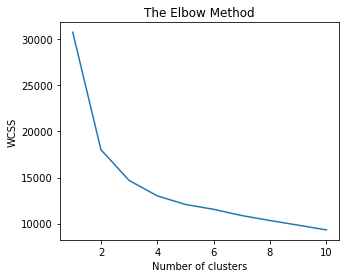

In [11]:
# find the appropriate cluster number
plt.figure(figsize=(5, 4))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_toClass)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
#identify number of clusters
n_clusters = 4

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
preprocessor = Pipeline(
       [("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42))])

In [14]:
clusterer = Pipeline(
      [
           (
              "kmeans",
              KMeans(
                  n_clusters=n_clusters,
                  init="k-means++",
                  n_init=50,
                  max_iter=500,
                  random_state=42,
            ),
        ),
    ]
 )

In [15]:
pipe = Pipeline(
        [("preprocessor", preprocessor),
         ("clusterer", clusterer)])

In [16]:
pipe.fit(data_toClass)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=42))]))])

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [17]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
preprocessed_data = pipe["preprocessor"].transform(data_toClass)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.5590069840124638

In [18]:
true_label_names = Response['CategClassif']
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

In [19]:
adjusted_rand_score(true_labels, predicted_labels)

0.048405554642835906

In [20]:
label_encoder.classes_

array([1, 2, 3, 4, 5])

In [21]:
n_clusters = len(label_encoder.classes_)

#### Silhouette

/Users/pamelainostroza/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


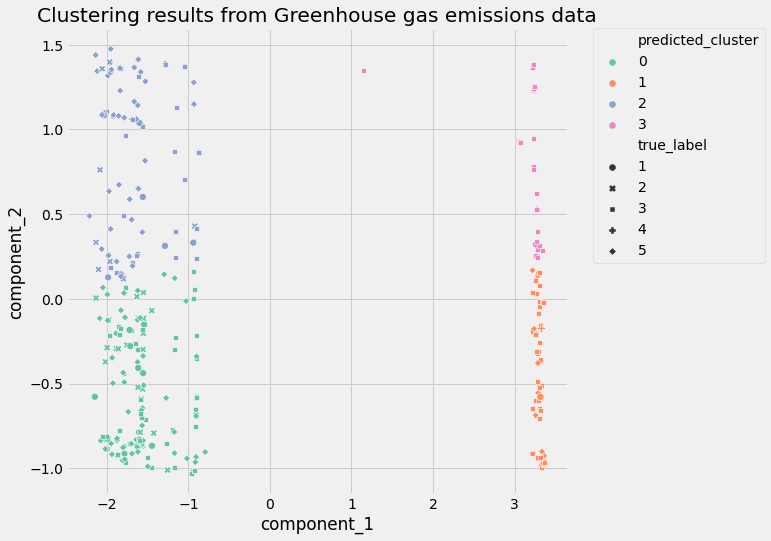

In [22]:
import seaborn as sns

pcadf = pd.DataFrame(
   pipe["preprocessor"].transform(data_toClass),
        columns=["component_1", "component_2"],
   )
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot(
     "component_1",
     "component_2",
     s=50,
     data=pcadf,
     hue="predicted_cluster",
     style="true_label",
     palette="Set2",
)

scat.set_title(
    "Clustering results from Greenhouse gas emissions data"
 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [23]:
#original data with clusters
Clusters_df = pd.DataFrame(data)
Clusters_df.columns = data.columns
Clusters_df["cluster"] = pipe["clusterer"]["kmeans"].labels_
Clusters_df

,Country Code,Country Name,City,CDP_id,CDP_Date_measure,CDP_Latitude,CDP_Longitude,CDP_Altitude,CDP_GDP,CDP_Land_Area,...,GDP_Trade Freedom,GDP_Investment Freedom,GDP_Financial Freedom,HDI_HDI,CDP_inconsistent,CDP_pct_change2,Emission_Population,Classif,CategClassif,cluster
0,ALB,Albania,Tirana,59163,2011.000,41.328,19.819,110.000,nan,1110.000,...,87.700,70.000,70.000,0.790,0.000,0.000,0.783,1,5,2
1,ARG,Argentina,Buenos Aires,31155,2013.571,-34.604,-58.382,25.000,39217081756.500,202.000,...,68.529,41.429,41.429,0.839,0.000,0.078,4.274,1,2,0
2,ARG,Argentina,Cordoba,50371,2014.667,-31.420,-64.189,390.000,12302882987.000,576.000,...,69.000,53.333,56.667,0.843,0.000,-0.019,3.396,1,5,0
3,ARG,Argentina,General Alvear Buenos Aires,69834,2014.000,-34.978,-67.695,nan,nan,nan,...,70.300,55.000,60.000,0.842,0.000,0.000,3.879,1,5,0
4,ARG,Argentina,Mendoza,50357,2015.000,-32.889,-68.846,nan,nan,nan,...,70.300,55.000,60.000,0.842,0.000,0.000,537.743,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,ZAF,South Africa,KwaDukuza,73645,2015.000,nan,nan,nan,nan,nan,...,76.000,45.000,50.000,nan,0.000,0.000,3.645,1,5,2
365,ZAF,South Africa,Nelson Mandela Bay,49363,2014.000,-33.745,25.568,69.000,52147.000,1950.000,...,77.300,40.000,50.000,0.705,0.000,0.000,10.617,0,3,0
366,ZAF,South Africa,Pretoria Tshwane,49360,2015.250,-25.746,28.188,1339.000,2739000000.000,6298.000,...,76.525,43.750,52.500,0.704,0.000,0.102,5.592,1,5,2
367,ZAF,South Africa,Pretoria Tshwane,49360,2012.500,-25.746,28.188,nan,nan,nan,...,76.350,52.500,60.000,0.697,0.000,0.000,nan,0,5,0


## Supervised classification

In [24]:
X = data_toClass
y = Response
print(X.shape, y.shape)

(369, 86) (369, 2)


### Split Data for train and test the model

In [25]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

33% of the data is selected for test the model, random_state = 1 allows reproducibility in the selection

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train
#y_train

(247, 86) (122, 86) (247, 2) (122, 2)


array([[ 1.00749394e-01, -9.17378685e-01, -3.22044962e-01, ...,
         6.46092959e-01,  5.70899069e-01, -2.15582493e-01],
       [ 4.51576635e-01,  3.11320199e-01,  5.68677058e-01, ...,
         1.71254150e-01,  2.11533252e-01, -2.34858206e-01],
       [ 5.63608618e-01, -6.84584194e-01, -4.52308657e-01, ...,
         9.62652166e-01,  5.92666822e-01, -4.08348612e+00],
       ...,
       [-7.49548542e-01, -6.34756119e-01,  1.15398352e+00, ...,
         1.71254150e-01, -1.33081101e+00, -1.11496429e-03],
       [-8.72813728e-02,  1.93501600e+00, -5.57927869e-01, ...,
        -6.20143867e-01, -2.20655595e-01,  8.01550653e-01],
       [-1.70326358e+00, -1.70364511e-01,  2.76463905e-01, ...,
        -1.41154188e+00, -1.34862099e+00, -1.11496429e-03]])

### Random forest

#### Binary classification

In [27]:
y1_train = y_train.iloc[:,0]
y1_test = y_test.iloc[:,0]
y1_train

248    0
111    1
51     0
92     1
112    1
      ..
203    1
255    0
72     1
235    1
37     1
Name: Classif, Length: 247, dtype: int64

- n_estimators: The number of trees in the forest.
- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.  
- random_state: Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). See Glossary for details.

In [28]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3)
model1.fit(X_train, y1_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [30]:
feature_imp = pd.Series(model1.feature_importances_,index=data_model.loc[:, 'CDP_Latitude':'CDP_pct_change2'].columns).sort_values(ascending=False)
feature_imp.head(10)

OWID_share_global_cumulative_oil_co2      0.077
CDP_pct_change2                           0.075
OWID_share_global_cumulative_co2          0.059
OWID_share_global_cumulative_cement_co2   0.043
OWID_gas_co2                              0.038
OWID_cumulative_oil_co2                   0.037
OWID_primary_energy_consumption           0.036
OWID_share_global_cumulative_gas_co2      0.034
OWID_ghg_per_capita                       0.032
OWID_share_global_gas_co2                 0.031
dtype: float64

In [31]:
from sklearn import metrics
# make predictions
yhat1 = model1.predict(X_test)
# evaluate predictions
mae1 = metrics.mean_absolute_error(y1_test, yhat1)
print('MAE1: %.3f' % mae1)

MAE1: 0.344


In [32]:
round(model1.score(X_train,y1_train), 4)

0.8381

In [33]:
round(model1.score(X_test,y1_test), 4)

0.6557

In [34]:
print(metrics.confusion_matrix(y1_test, yhat1))
print(metrics.classification_report(y1_test, yhat1))
print(metrics.accuracy_score(y1_test, yhat1))

[[38 21]
 [21 42]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        59
           1       0.67      0.67      0.67        63

    accuracy                           0.66       122
   macro avg       0.66      0.66      0.66       122
weighted avg       0.66      0.66      0.66       122

0.6557377049180327


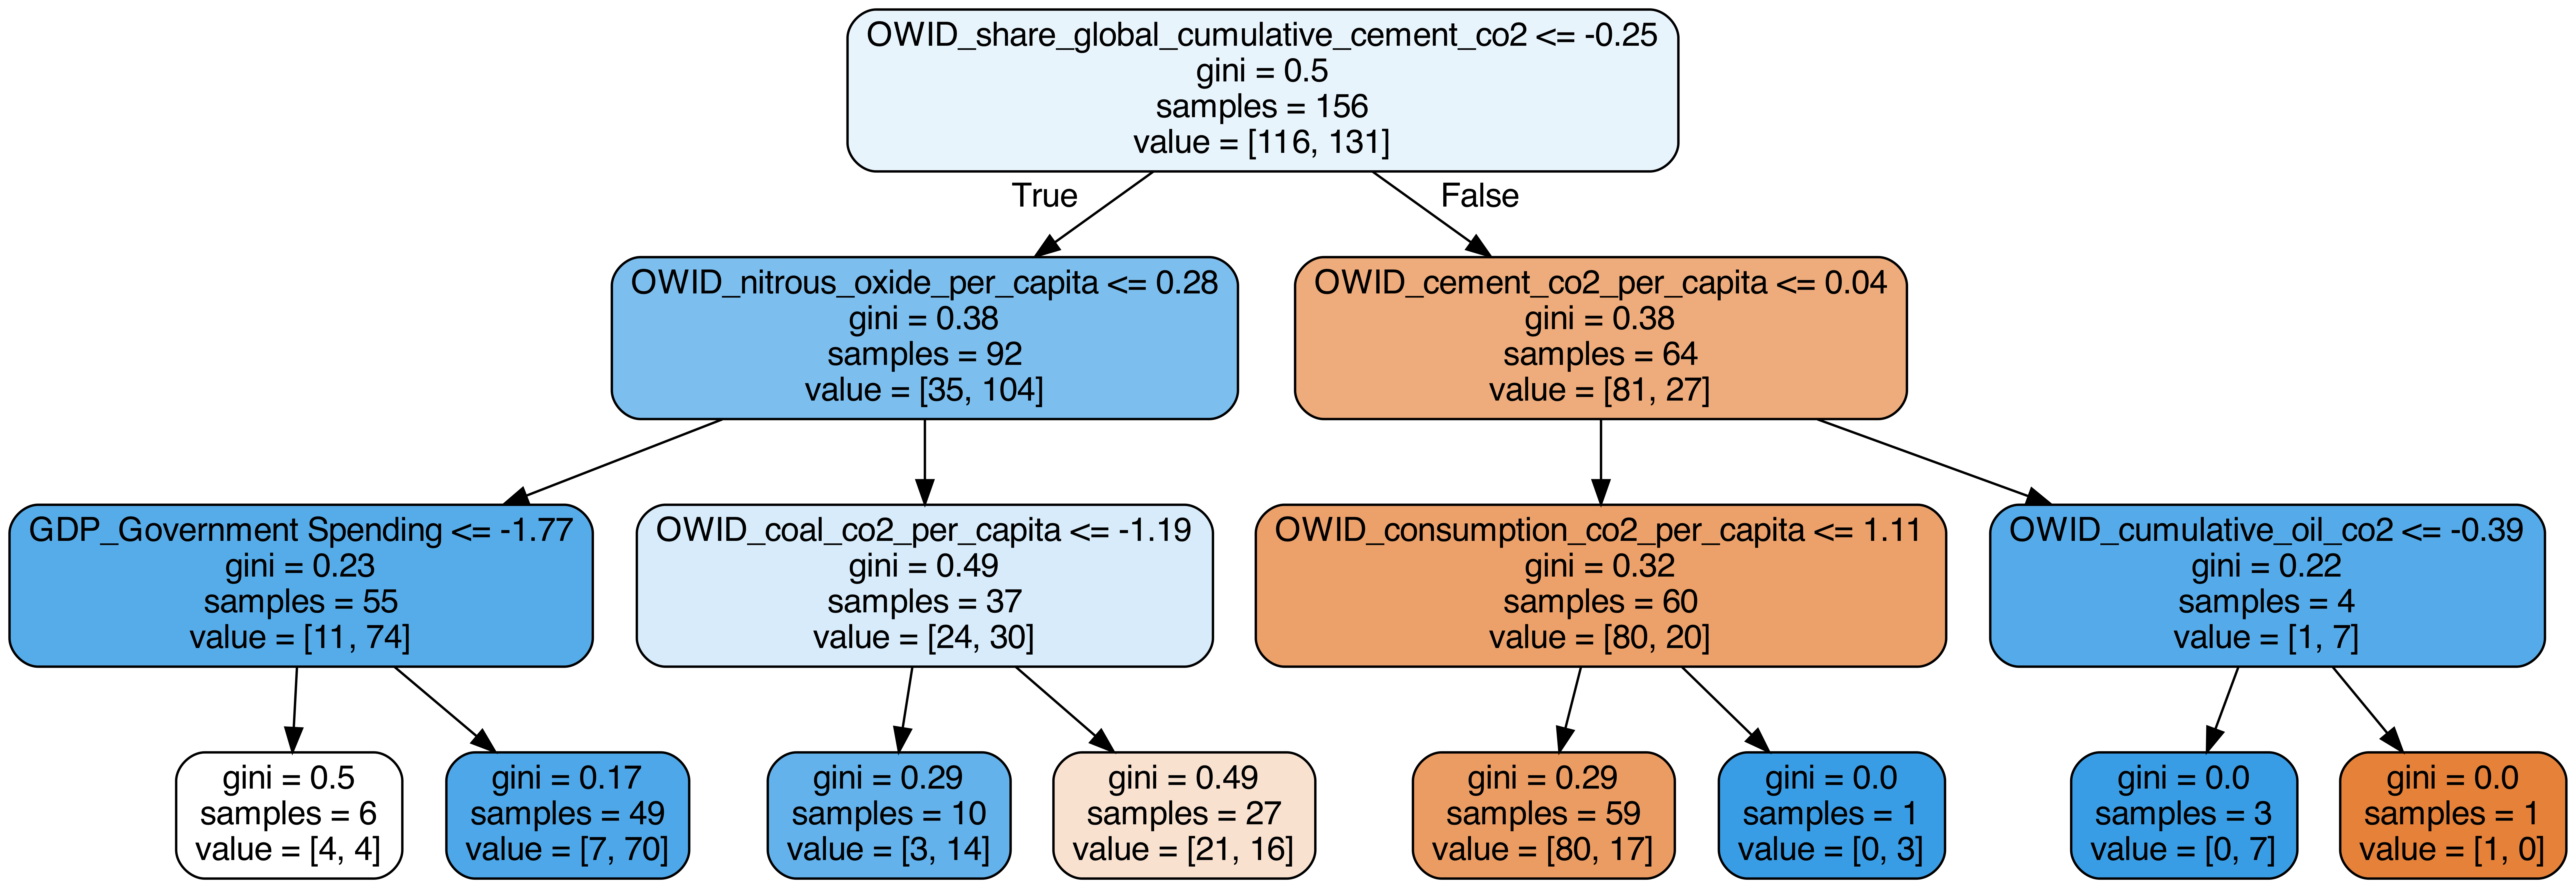

In [36]:
estimator = model1.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree1.dot', 
                feature_names = data_model.loc[:, 'CDP_Latitude':'CDP_pct_change2'].columns,
                #class_names = data_reduced.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')


#### Multiple classification

In [37]:
##using manual classification
y2_train = y_train.iloc[:,1]
y2_test = y_test.iloc[:,1]
y2_train

248    3
111    5
51     1
92     3
112    5
      ..
203    2
255    3
72     5
235    3
37     5
Name: CategClassif, Length: 247, dtype: int64

In [38]:

##using results from cluster
X_train, X_test, yc_train, yc_test = train_test_split(X, Clusters_df["cluster"], test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, yc_train.shape, yc_test.shape)
X_train
#y_train


y2_train = yc_train
y2_test = yc_test
y2_train


(247, 86) (122, 86) (247,) (122,)


248    1
111    0
51     2
92     2
112    2
      ..
203    0
255    1
72     2
235    0
37     0
Name: cluster, Length: 247, dtype: int32

In [39]:
model2 = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3)
model2.fit(X_train, y2_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [41]:
feature_imp = pd.Series(model2.feature_importances_,index=data_model.loc[:, 'CDP_Latitude':'CDP_pct_change2'].columns).sort_values(ascending=False)
feature_imp.head(20)

CDP_Gas_PFCs                            0.112
CDP_Gas_SF6                             0.097
CDP_Gas_HFCs                            0.073
CDP_Gas_NF3                             0.066
OWID_cumulative_gas_co2                 0.035
OWID_gas_co2                            0.033
OWID_total_ghg                          0.026
OWID_share_global_cumulative_gas_co2    0.025
OWID_share_global_cumulative_coal_co2   0.024
OWID_co2                                0.024
OWID_cumulative_co2                     0.023
OWID_coal_co2                           0.023
CDP_Gas_N20                             0.022
OWID_cumulative_flaring_co2             0.022
OWID_oil_co2                            0.022
OWID_share_global_cumulative_co2        0.018
OWID_other_industry_co2                 0.018
OWID_cumulative_coal_co2                0.017
OWID_consumption_co2                    0.016
OWID_share_global_flaring_co2           0.016
dtype: float64

In [42]:
from sklearn.metrics import mean_absolute_error
# make predictions
yhat2 = model2.predict(X_test)
# evaluate predictions
mae2 = mean_absolute_error(y2_test, yhat2)
print('MAE2: %.3f' % mae2)

MAE2: 0.066


In [43]:
round(model2.score(X_train,y2_train), 4)

0.9919

In [44]:
round(model2.score(X_test,y2_test), 4)

0.9672

In [45]:
print(metrics.confusion_matrix(y2_test,yhat2))
print(metrics.classification_report(y2_test,yhat2))
print(metrics.accuracy_score(y2_test, yhat2))

[[43  0  2  0]
 [ 0 23  0  0]
 [ 0  0 35  0]
 [ 0  2  0 17]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.92      1.00      0.96        23
           2       0.95      1.00      0.97        35
           3       1.00      0.89      0.94        19

    accuracy                           0.97       122
   macro avg       0.97      0.96      0.96       122
weighted avg       0.97      0.97      0.97       122

0.9672131147540983


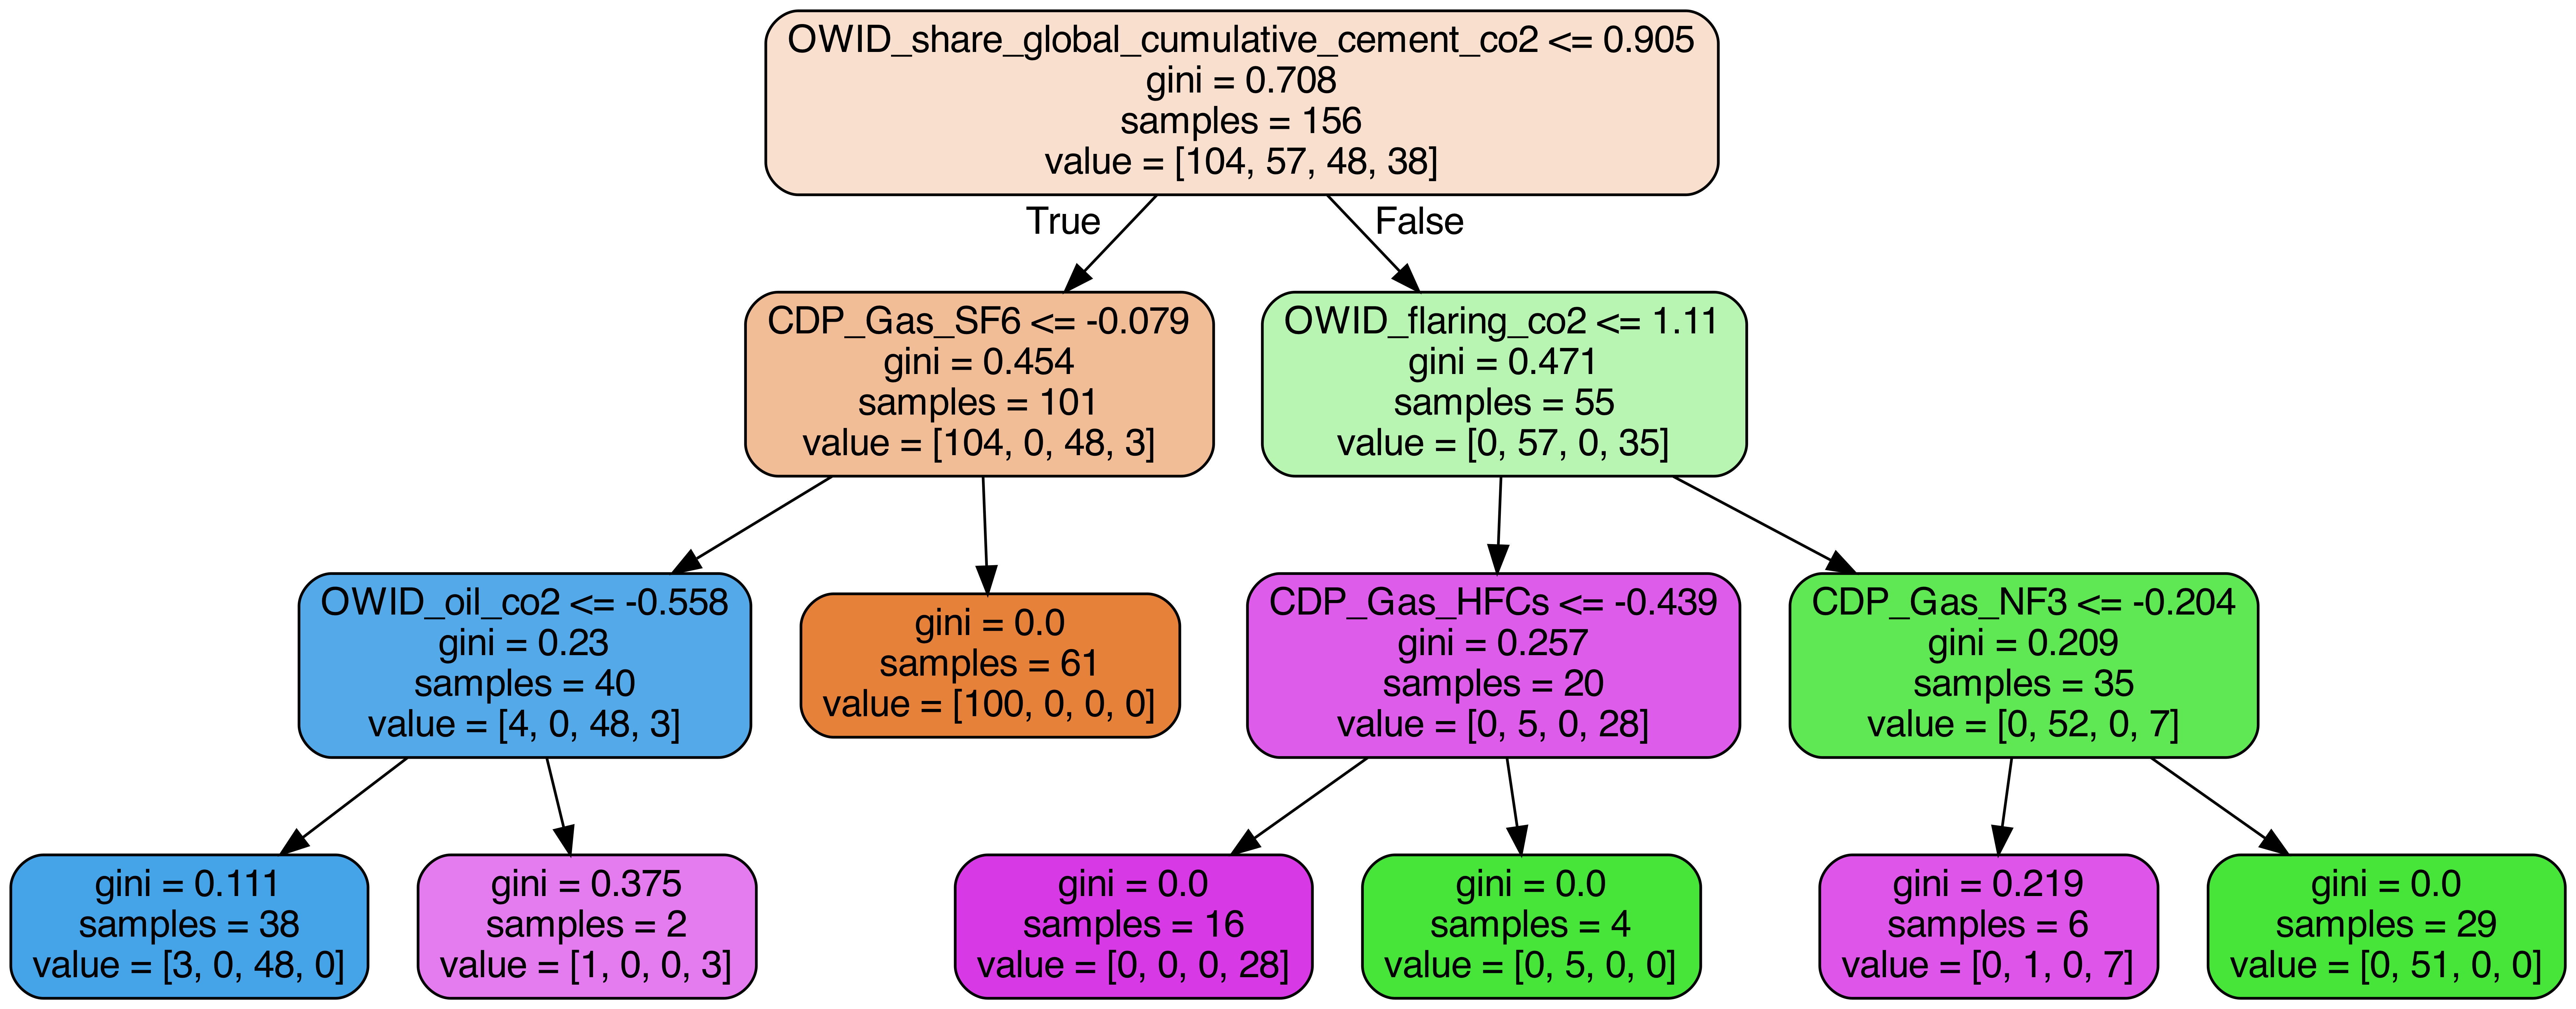

In [46]:
estimator = model2.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = data_model.loc[:,'CDP_Latitude':'CDP_pct_change2'].columns,
                #class_names = data_reduced.target_names,
                rounded = True, proportion = False, 
                precision = 3, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
#save csv with clusters
Clusters_df.to_csv('../data/02_output/03_Clusters.csv')